<a href="https://colab.research.google.com/github/AriyantGit/Book_recomendation/blob/main/Books_recomendation_pearson_corelation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print("Necessary packages included successfully!")

Necessary packages included successfully!


In [160]:
df_books=pd.read_csv("/content/gdrive/MyDrive/Books_Data/BX-Books.csv",sep=";", encoding='latin-1',on_bad_lines='skip')

In [161]:
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [162]:
df_user=pd.read_csv("/content/gdrive/MyDrive/Books_Data/BX-Users.csv",sep=";", encoding='latin-1',on_bad_lines='skip')

In [163]:
df_user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [164]:
df_rating=pd.read_csv("/content/gdrive/MyDrive/Books_Data/BX-Book-Ratings.csv",sep=";", encoding='latin-1',on_bad_lines='skip')

In [165]:
df_rating.sort_values("User-ID").head()

,User-ID,ISBN,Book-Rating
9561,2,0195153448,0
9562,7,034542252,0
9572,8,0771025661,0
9580,8,1881320189,7
9579,8,1575663937,6


In [166]:
df_rating.shape

(1149780, 3)

# **Data Preparation (Data Cleaning and Feature Engineering)**

# droping the image url from df_books data

In [167]:
image_book_df=df_books.copy()

df_books.drop(["Image-URL-S","Image-URL-M","Image-URL-L"],axis=1,inplace=True)
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [168]:
df_books.shape

(271360, 5)

### replacing '-' with '_' and features name in lower case

In [169]:
df_books.columns=df_books.columns.str.strip().str.lower().str.replace("-","_")
df_user.columns=df_user.columns.str.strip().str.lower().str.replace("-","_")
df_rating.columns=df_rating.columns.str.strip().str.lower().str.replace("-","_")

In [170]:
df_rating.columns

Index(['user_id', 'isbn', 'book_rating'], dtype='object')

Text(0, 0.5, 'Count')

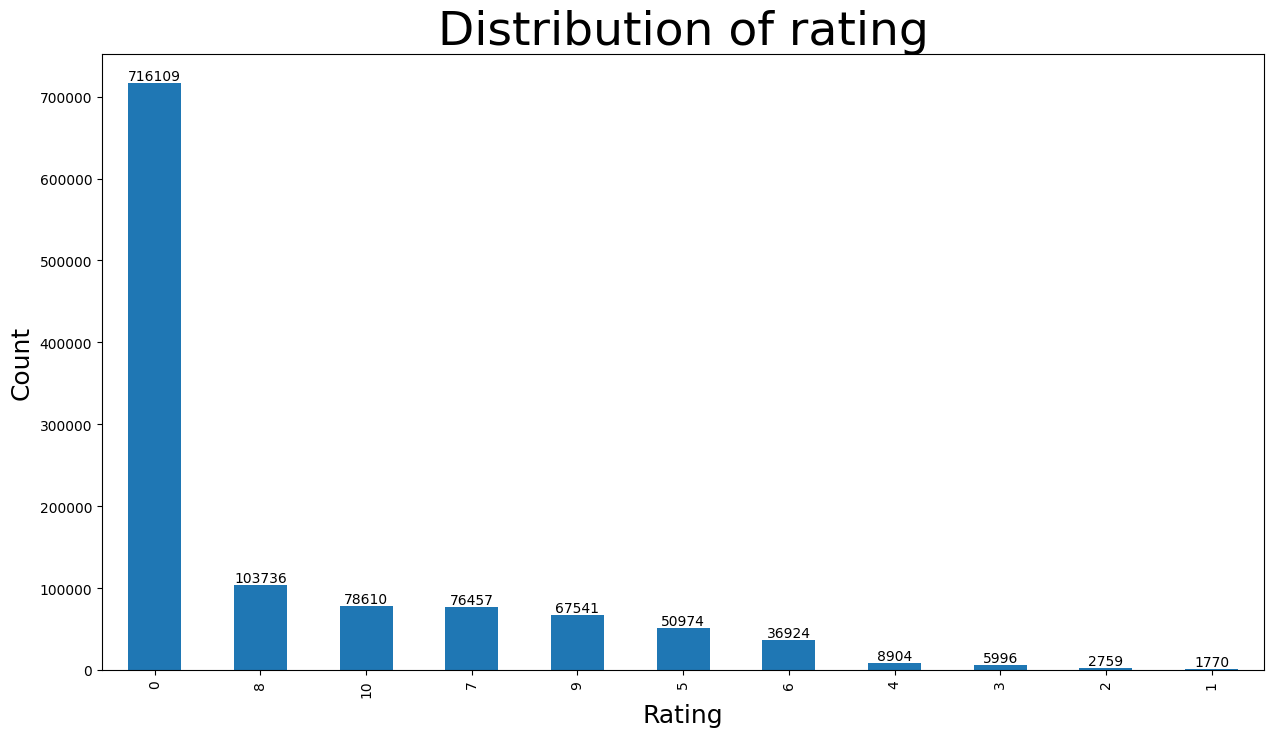

In [171]:
plt.figure(figsize=(15,8))
bar=df_rating["book_rating"].value_counts().plot(kind="bar")
for label in bar.containers:
    bar.bar_label(label)
plt.title("Distribution of rating",size=34)
plt.xlabel("Rating",size=18)
plt.ylabel("Count",size=18)

## To ensure statistical significance, users with less than 200 ratings, and books with less than 100 ratings are excluded.

In [172]:
user_id_counts1 = df_rating['user_id'].value_counts()
user_id_counts1 = user_id_counts1[user_id_counts1>200]

ratings = df_rating[df_rating['user_id'].isin(user_id_counts1.index)]
print( ratings['user_id'].duplicated().value_counts())
print(ratings)

True     525457
False       899
Name: user_id, dtype: int64
         user_id        isbn  book_rating
1456      277427  002542730X           10
1457      277427  0026217457            0
1458      277427  003008685X            8
1459      277427  0030615321            0
1460      277427  0060002050            0
...          ...         ...          ...
1147612   275970  3829021860            0
1147613   275970  4770019572            0
1147614   275970   896086097            0
1147615   275970  9626340762            8
1147616   275970  9626344990            0

[526356 rows x 3 columns]


# Top 10 Highest Ratings Books

In [173]:
book_rating=ratings.groupby("isbn")["book_rating"].count()
book_rating=book_rating.sort_values(ascending=False).head(10)
book_rating=pd.DataFrame(book_rating).reset_index()
book_rating.rename(columns={"index":"ISBN","book_rating":"Rating_Count"},inplace=True)
#book_rating.
book_rating.head()

,isbn,Rating_Count
0,0971880107,363
1,0316666343,270
2,0060928336,220
3,0440214041,218
4,0385504209,215


In [174]:
df_books.columns

Index(['isbn', 'book_title', 'book_author', 'year_of_publication',
       'publisher'],
      dtype='object')

In [175]:
bookname=book_rating.merge(df_books,left_on="isbn",right_on="isbn")


In [176]:
bookname.head()

,isbn,Rating_Count,book_title,book_author,year_of_publication,publisher
0,0971880107,363,Wild Animus,Rich Shapero,2004,Too Far
1,0316666343,270,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
2,0060928336,220,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
3,0440214041,218,The Pelican Brief,John Grisham,1993,Dell
4,0385504209,215,The Da Vinci Code,Dan Brown,2003,Doubleday


Text(0.5, 1.0, 'TOP 10 BOOKS HIGHEST RATINGS')

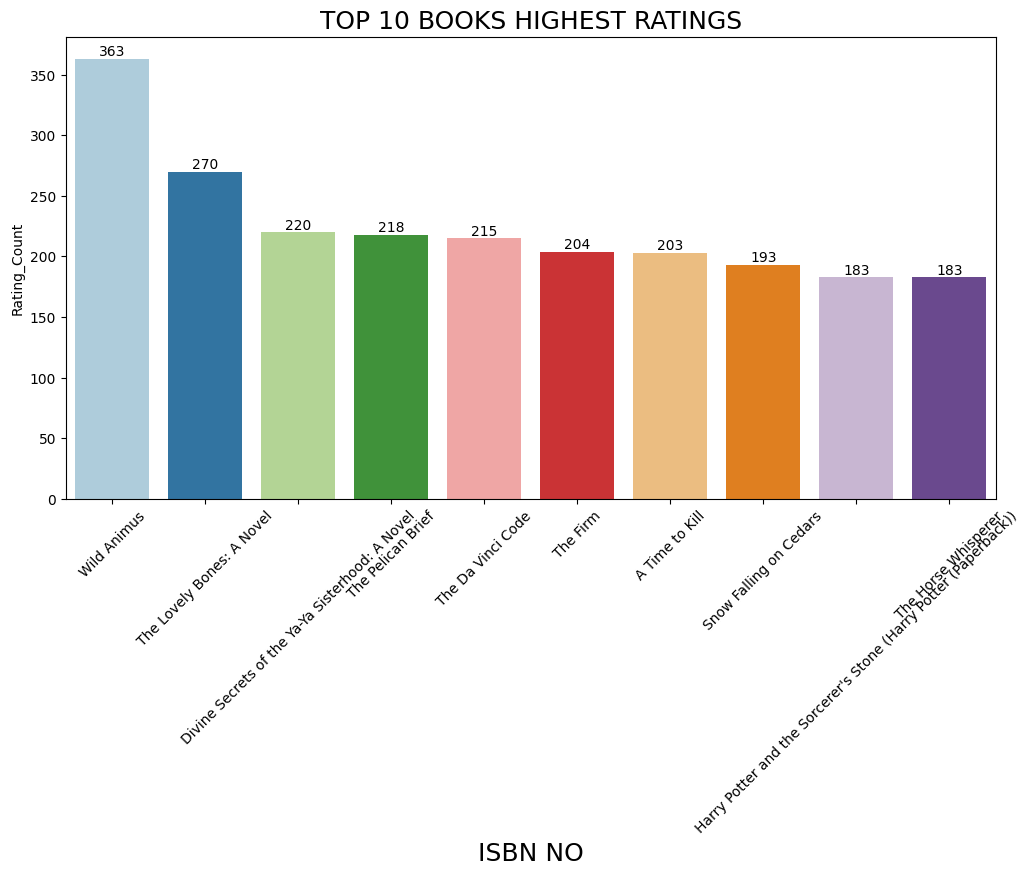

In [177]:
plt.figure(figsize=(12,6))
bar=sns.barplot(x="book_title",y="Rating_Count",data=bookname,palette="Paired")
for label in bar.containers:
    bar.bar_label(label)
bar.set_xticklabels(bar.get_xticklabels(),rotation=45)
plt.xlabel("ISBN NO",size=18)
plt.title("TOP 10 BOOKS HIGHEST RATINGS",size=18)

# CALCULATING AVERAGE RATING FOR CORRELATION

In [178]:
average_rating=pd.DataFrame(df_rating.groupby("isbn")["book_rating"].mean())
average_rating["rating_count"]=pd.DataFrame(df_rating.groupby("isbn")["book_rating"].count())
average_rating.sort_values("rating_count",ascending=False).head()

,book_rating,rating_count
isbn,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


# Rating matrix

In [179]:
ratings.columns

Index(['user_id', 'isbn', 'book_rating'], dtype='object')

In [180]:
ratings_pivot=ratings.pivot(index="user_id",columns="isbn").book_rating
print(ratings_pivot.shape)
ratings_pivot.head()

(899, 207291)


isbn,0330299891,0375404120,0586045007,9022906116,9032803328,9044922564,9044922572,9044922718,9044923161,904492401X,...,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\0432534220\""""","\2842053052\""""",b00005wz75,cn108465,cn113107,Ô½crosoft
user_id,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Randomly Choice book

choice book whose rating count is greater than 50

In [181]:
isbn_list=ratings_pivot.columns
choice_isbn=average_rating[average_rating["rating_count"]>50.0]
book_isbn=np.random.choice(choice_isbn.index)
book_isbn

'0553560247'

In [182]:
book_rating=ratings_pivot[book_isbn]

In [183]:
similar_books=ratings_pivot.corrwith(book_rating)
similar_books_corr=pd.DataFrame(similar_books,columns=["pearson_corr"])

In [184]:
similar_books_corr.dropna(inplace=True)

In [185]:
corr_summary = similar_books_corr.join(average_rating['rating_count'])
corr_summary=corr_summary[corr_summary['rating_count']>=300].sort_values('pearson_corr', ascending=False).head(10)
corr_summary

,pearson_corr,rating_count
isbn,,
0345313860,0.874915,301
0316776963,0.763414,340
0060938455,0.755929,321
0385484518,0.741313,391
0440236673,0.660701,408
0440234743,0.659971,422
0375726403,0.632650,321
0452282829,0.611535,342
0671510053,0.559909,349


In [186]:
image_book_df=image_book_df.merge(corr_summary,left_on="ISBN",right_on="isbn")

In [187]:
image_book_df.drop(columns=["Image-URL-L","Image-URL-M"],axis=1,inplace=True)

Top 5 Recommended Books

In [188]:
def show_image(val):
    return '<a href="{}"><img src="{}" width=50></img></a>'.format(val, val)


#popular_recs[~popular_recs["book_id"].isin(liked_books)].head(10).style.format({'url': make_clickable, 'cover_image': show_image})
image_book_df.head(5).style.format({'Image-URL-S': show_image})

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,pearson_corr,rating_count
0,0440234743,The Testament,John Grisham,1999,Dell,,0.659971,422
1,0440225701,The Street Lawyer,JOHN GRISHAM,1999,Dell,,0.548512,379
2,0375726403,Empire Falls,Richard Russo,2002,Vintage Books USA,,0.632650,321
3,0345313860,"The Vampire Lestat (Vampire Chronicles, Book II)",ANNE RICE,1986,Ballantine Books,,0.874915,301
4,0060938455,Fast Food Nation: The Dark Side of the All-American Meal,Eric Schlosser,2002,Perennial,,0.755929,321
